In [1]:
%pylab notebook
from LHC_param import *
from particle_param import *
import os,re
from io_lib import *

Populating the interactive namespace from numpy and matplotlib


In [139]:


# beam parameters
e,m0,c,E0=proton_param();

# machine parameters
machine2save='LHC'; 
beam='1';

# subdirectory (inside DELPHI_results/[machine2save]) where to put the results
RunDir='RunII/';
ResultDir='/afs/cern.ch/work/n/nbiancac/scratch0/DELPHI_results/'+machine2save+'/'+RunDir;
ResultDir2012='/afs/cern.ch/work/n/nbiancac/scratch0/DELPHI_results/'+machine2save+'/'+RunDir;
os.system("mkdir -p "+ResultDir);

# flags for plotting and DELPHI
flagdamperimp=0; # 1 to use frequency dependent damper gain (provided in Zd,fd)
strnorm=[''];
flagnorm=0; # 1 if damper matrix normalized at current chromaticity (instead of at zero chroma)
flagplot=True; # to write impedance files by elements
nevery=1; # downsampling of the impedance (take less points than in the full model)
wake_calc=False; # True -> compute wake as well (otherwise only imp.)


#kmax=5; # number of converged eigenvalues (kmax most unstable ones are converged)
#kmaxplot=20; # number of kept and plotted eigenvalues (in TMCI plot)
col=['b','r','g','m','k','c','y','b--','r--','g--','m--','k--','c--','y--']; # colors
linetype=['-','--',':'];

# scan definition
scenarioscan=np.array(['LHC_ft_6.5TeV_B1_2016']) # name in Coll_settings without ".txt"

scenarioscan=np.array(['LHC_ft_6.5TeV_B1_2016_TCP7_5.5sig_TCSG7_7.5sig',	    'LHC_ft_6.5TeV_B1_2016_TCP7_5.0sig_TCSG7_7.0sig',	    'LHC_ft_6.5TeV_B1_2016_TCP7_4.5sig_TCSG7_6.5sig',	    'LHC_ft_6.5TeV_B1_2016_TCP7_4.0sig_TCSG7_6.0sig',	    'LHC_ft_6.5TeV_B1_2016_TCP7_4.0sig_TCSG7_5.0sig'])

model=['Nominal LHC'  for ii in scenarioscan]; # case in LHC_param
Escan=np.array([6500e9 for ii in scenarioscan]); # Energy
subscan=np.array([4])
print subscan

# setting the scans
planes=['x','y'];
Qpscan=np.arange(-5,6,1);
dampscan=np.array([0, 0.005, 0.01, 0.02]); # damper gain scan
Nbscan=np.arange(2.5e10, 7.5e11, 2.5e10)
Mscan=np.array([1]); # scan on number of bunches
imp_fact=3. #impedance factor

M=[1.]

for iscenario,scenario in enumerate(scenarioscan[subscan]):

    root_result=ResultDir+scenarioscan[subscan[iscenario]]+'/'
    os.system("mkdir -p "+root_result);

    if machine2save=='LHC':
        #machine_str,E,gamma,sigmaz,taub,R,Qx,Qxfrac,Qy,Qyfrac,Qs,eta,f0,omega0,omegas,dphase,Estr,V,h, M,en=LHC_param(E0,E=Escan[subscan[iscenario]],scenario=model[subscan[iscenario]])
        machine=LHC(E0,E=Escan[subscan[iscenario]],scenario=model[subscan[iscenario]])
         
        
        

[4]


### Mode shift as a function of intensity

<IPython.core.display.Javascript object>


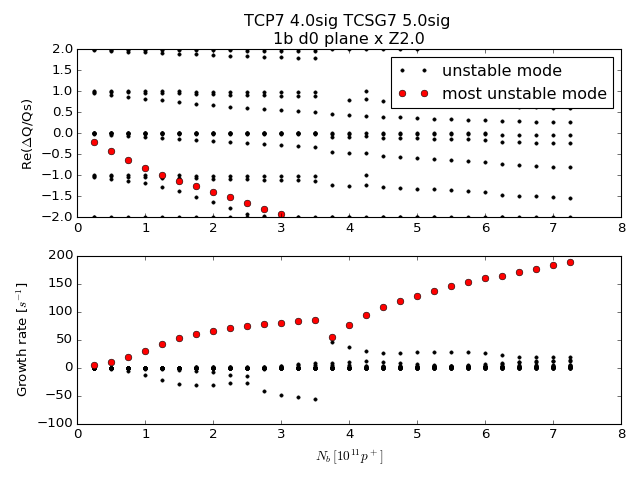

/afs/cern.ch/work/n/nbiancac/scratch0/DELPHI_results/LHC/RunII/TMCI_Results//TMCI_all_LHC_6500GeVLHC_ft_6.5TeV_B1_2016_TCP7_4.0sig_TCSG7_5.0sig_1b_d0_Nbmax7p25e11_converged_x_Z2.0.pdf


In [175]:


M=1
damp=0.0
plane='x'
imp_fact=2.0
Estr=float_to_str(round(Escan[subscan[iscenario]]/1e9))+'GeV';
iQp=np.where(Qpscan==-5)[0]

    
for Nb in Nbscan:
    
    part='imag'
    fileoutdata_all=root_result+'/data_vs_Qp_all_'+machine.name+'_'+Estr+scenario+'_'+str(M)+'b_d'+\
    ('%.3g'%(damp)).replace('.','p')+'_Nb'+('%.3g'%(Nb/1.e11)).replace('.','p')+'e11_converged'+strnorm[flagnorm]+'_'+plane+\
    '_Z'+str(imp_fact)+'_'+part+'.dat';
    L=np.genfromtxt(fileoutdata_all, skip_header=1)
    Qp=L[iQp,0]
    Qim=-L[iQp,1:-1]
    
    plt.figure(1)
    plt.subplot(2,1,2)
    ax1 =plt.plot(np.ones(len(Qim))*Nb/1.e11,(Qim*machine.omega0),'.k')
    ax2 =plt.plot(Nb/1.e11,Qim.max()*machine.omega0,'or')
#     plt.ylim(-5, 5)
    plt.ylabel(r'Growth rate [$s^{-1}$]')
    plt.xlabel(r'$N_b\,[10^{11} p^+]$');
    
    part='real'
    fileoutdata_all=root_result+'/data_vs_Qp_all_'+machine.name+'_'+Estr+scenario+'_'+str(M)+'b_d'+\
    ('%.3g'%(damp)).replace('.','p')+'_Nb'+('%.3g'%(Nb/1.e11)).replace('.','p')+'e11_converged'+strnorm[flagnorm]+'_'+plane+\
    '_Z'+str(imp_fact)+'_'+part+'.dat';
    L=np.genfromtxt(fileoutdata_all, skip_header=1)
    Qp=L[iQp,0]
    Qre=L[iQp,1:-1]
    Qre=(Qre)/machine.Qs

    plt.subplot(2,1,1)
    plt.plot(np.ones(len(Qre))*Nb/1.e11,Qre,'.k')
    plt.plot(Nb/1.e11,np.ravel(Qre)[Qim.argmax()],'or')
    plt.ylim(-2, 2)
    plt.ylabel(r'Re($\Delta$Q/Qs)')

legend(handles=[ax1[0],ax2[0]],labels=['unstable mode','most unstable mode'])    
title_name=(scenario.replace('LHC_ft_6.5TeV_B1_2016_','')+'_\n'+str(M)+'b_d'+\
('%.3g'%(damp)).replace('.','p')+'_plane_'+plane+'_Z'+str(imp_fact)).replace('_',' ')
    
plt.title(title_name)

tight_layout()

name='/TMCI_all_'+machine.name+'_'+Estr+scenario+'_'+str(M)+'b_d'+\
('%.3g'%(damp)).replace('.','p')+'_Nbmax'+('%.3g'%(Nb/1.e11)).replace('.','p')+'e11_converged'+strnorm[flagnorm]+'_'+plane+\
'_Z'+str(imp_fact)
plt.savefig(ResultDir+'TMCI_Results/'+name+'.pdf', format='pdf')
    
print ResultDir+'TMCI_Results/'+name+'.pdf'    
    
    

###  Growth rate as a function of Intensity and chromaticty

<IPython.core.display.Javascript object>


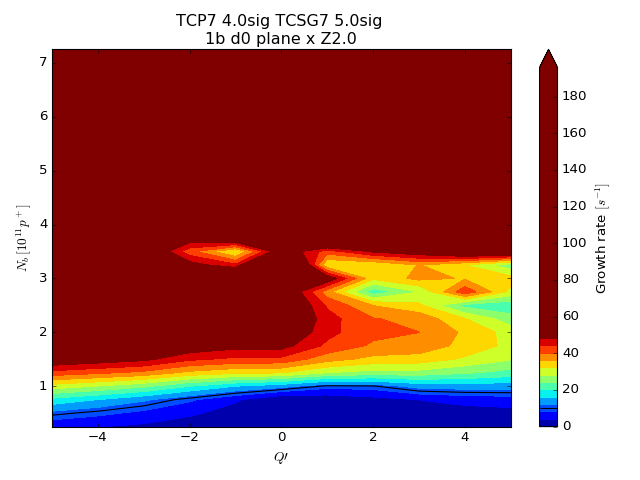

/afs/cern.ch/work/n/nbiancac/scratch0/DELPHI_results/LHC/RunII/TMCI_Results//GR_all_LHC_6500GeVLHC_ft_6.5TeV_B1_2016_TCP7_4.0sig_TCSG7_5.0sig_1b_d0_Nbmax7p25e11_converged_x_Z2.0.pdf


In [163]:
from mpl_toolkits.mplot3d import Axes3D


iQp=np.where(Qpscan<6)[0]
Z=[]
    
for Nb in Nbscan:
    
    part='imag'
    fileoutdata_all=root_result+'/data_vs_Qp_all_'+machine.name+'_'+Estr+scenario+'_'+str(M)+'b_d'+\
    ('%.3g'%(damp)).replace('.','p')+'_Nb'+('%.3g'%(Nb/1.e11)).replace('.','p')+'e11_converged'+strnorm[flagnorm]+'_'+plane+\
    '_Z'+str(imp_fact)+'_'+part+'.dat';
    L=np.genfromtxt(fileoutdata_all, skip_header=1)
    Qp=L[iQp,0]
    Qim=-L[iQp,1]
    Z.append(Qim*machine.omega0)
    
x=Qpscan
y=Nbscan/1.e11
X, Y = np.meshgrid(x, y)

fig=figure()
ax = fig.add_subplot(111)

cax = ax.contourf(X,Y,Z, 50, vmax=50, extend='max')

cbar = fig.colorbar(cax)
cbar.cmap
cbar.ax.set_ylabel(r'Growth rate $[s^{-1}]$')
ax.set_xlabel(r'$Q\prime$'); ax.set_ylabel(r'$N_b\,[10^{11} p^+]$');


ax.set_title(scenario.replace('_',' '))


CS2 = contour(cax, levels=[10],
                      colors='k',
                      origin='lower',
                      hold='on')
cbar.add_lines(CS2)


title_name=(scenario.replace('LHC_ft_6.5TeV_B1_2016_','')+'_\n'+str(M)+'b_d'+\
('%.3g'%(damp)).replace('.','p')+'_plane_'+plane+'_Z'+str(imp_fact)).replace('_',' ')
    
plt.title(title_name)
tight_layout()
    
name='/GR_all_'+machine.name+'_'+Estr+scenario+'_'+str(M)+'b_d'+\
('%.3g'%(damp)).replace('.','p')+'_Nbmax'+('%.3g'%(Nb/1.e11)).replace('.','p')+'e11_converged'+strnorm[flagnorm]+'_'+plane+\
'_Z'+str(imp_fact)
plt.savefig(ResultDir+'TMCI_Results/'+name+'.pdf', format='pdf')

print ResultDir+'TMCI_Results/'+name+'.pdf'

### Octupole current threshold vs Intensity and chromaticty 

<IPython.core.display.Javascript object>


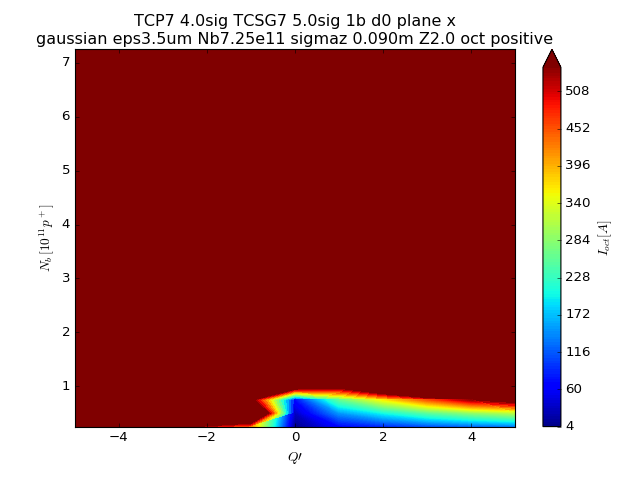

/afs/cern.ch/work/n/nbiancac/scratch0/DELPHI_results/LHC/RunII/TMCI_Results//SD_all_LHC_6500GeVLHC_ft_6.5TeV_B1_2016_TCP7_4.0sig_TCSG7_5.0sig_1b_d0_Nbmax7p25e11_plane__xgaussian_eps3.5um_sigmaz_0.090m_Z2.0_oct_positive.pdf


In [161]:
epsn=2.5
epsn_new=3.5

fact_emittance=epsn/epsn_new

sigmaz=0.09;
sign='positive'
distribution='gaussian'

iQp=np.where(Qpscan<6)[0]
Z=[]
    
for Nb in Nbscan:
    
    name = ResultDir+'TMCI_Results/'+scenario+'_SD_vs_Qp_d'+('%.3g'%(damp)).replace('.','p')+'_plane_'+plane+'_M'+str(M)+'_'+\
    distribution+'_eps'+('%g'%epsn)+'um_Nb'+('%g'%(Nb/1.e11))+'e11_sigmaz_'+('%.3f'%sigmaz)+'m_Z'+str(imp_fact)+\
    '_oct_'+sign+'.txt'
    
    L=np.genfromtxt(name,delimiter=',')
    
    Qp=L[iQp,0]
    Ioct=L[iQp,1]
    Z.append(Ioct*fact_emittance)
    
x=Qpscan
y=Nbscan/1.e11
X, Y = np.meshgrid(x, y)

Z=np.array(Z)

fig=figure()
ax = fig.add_subplot(111)
cax1 = ax.contourf(X,Y,Z, 170, vmin=0., vmax=550)

Z[np.where(Z>550)]=np.nan
cax2 = ax.contourf(X,Y,Z, 170, vmin=0., vmax=550, extend='max')

cbar = fig.colorbar(cax2)

cbar.ax.set_ylabel(r'$I_{oct} [A]$')
ax.set_xlabel(r'$Q\prime$'); ax.set_ylabel(r'$N_b\,[10^{11} p^+]$');
ax.set_title(scenario.replace('_',' '))

title_name=(scenario.replace('LHC_ft_6.5TeV_B1_2016_','')+'_'+str(M)+'b_d'+\
('%.3g'%(damp)).replace('.','p')+'_plane_'+plane+'\n'+distribution+'_eps'+('%g'%epsn_new)+'um_Nb'+('%g'%(Nb/1.e11))+'e11_sigmaz_'+('%.3f'%sigmaz)+'m_Z'+str(imp_fact)+\
    '_oct_'+sign).replace('_',' ')
    
plt.title(title_name)

tight_layout()

name='/SD_all_'+machine.name+'_'+Estr+scenario+'_'+str(M)+'b_d'+\
('%.3g'%(damp)).replace('.','p')+'_Nbmax'+('%.3g'%(Nb/1.e11)).replace('.','p')+'e11_plane_'+strnorm[flagnorm]+'_'+plane+\
distribution+'_eps'+('%g'%epsn_new)+'um_sigmaz_'+('%.3f'%sigmaz)+'m_Z'+str(imp_fact)+\
    '_oct_'+sign
plt.savefig(ResultDir+'TMCI_Results/'+name+'.pdf', format='pdf')

print ResultDir+'TMCI_Results/'+name+'.pdf'